In [ ]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
np.random.seed(42)
import nltk
import warnings
warnings.filterwarnings('ignore')

CPU times: user 245 µs, sys: 641 µs, total: 886 µs
Wall time: 934 µs


## Reading the file

In [ ]:
## Folder Path
path = '/content/drive/MyDrive/Omar/AAAI-Submission/ChatGPT-Exps/'
## File Name
file_name = path +'F1-FS-L-2-ChatGPT-Predictions.csv'
data = pd.read_csv(file_name)
print(len(data))
data.head()

509


,Text,AL,MA,PPE,CDU,TP,OTH,Labels,ChatGPT-Prediction
0,"Just started on Bupe today, actually just put ...",0,1,1,0,0,0,"['MA', 'PPE']","['MA', 'TP', 'PPE', 'CDU']"
1,Day 5 detox and all I have left is rls. I jump...,0,0,1,0,1,0,"['PPE', 'TP']","['TP', 'PPE']"
2,Drug testing question. Hello everyone!\n\nHad ...,0,0,0,0,0,1,['OTH'],"['AL', 'PPE', 'CDU']"
3,Inpatient Rehab Question. I’m going to a 28 da...,0,0,1,0,1,0,"['PPE', 'TP']","['TP', 'PPE']"
4,Am I the only one who wants to stay on bupe fo...,0,0,0,0,0,1,['OTH'],"['MA', 'PPE']"


In [ ]:
from sklearn.metrics import cohen_kappa_score
import numpy as np
from sklearn.metrics import classification_report, f1_score

##Different Functions
target_cols= ['AL', 'MA', 'TP', 'PPE', 'CDU', 'OTH']

from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer

def single_class_post_distribution(dataset,classes):
    number_of_comments = []
    for labels in classes:
      number_of_comments.append((labels, dataset[labels].sum()))
    stats = pd.DataFrame(number_of_comments,columns = ['class','number_of_posts'])
    return stats

def draw_dis(stats, nm):
    plt.figure(figsize=(5,3))
    splot = sns.barplot(x = 'class',y = 'number_of_posts',data = stats)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '1.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      size=10,
                      xytext = (0, -8),
                      textcoords = 'offset points')
    plt.xticks(rotation=45)
    #plt.title("Number of documents in ea category")
    plt.ylabel('Number of occurrences', fontsize=12)
    plt.xlabel(nm, fontsize=12)
    #plt.savefig(str(nm)+'.png',dpi = 400,bbox_inches ='tight')


def Classwise_report(lst1, lst2, target_cols, name):
    multilabel = MultiLabelBinarizer()
    multilabel.fit([target_cols])
    #print(multilabel.classes_)
    print(str(name))
    true = multilabel.fit_transform(lst1)
    pred = multilabel.fit_transform(lst2)
    print(classification_report(true, pred, target_names=target_cols))
    print("F1: ", f1_score(true, pred, average='weighted'))
def exact_match(lst1, lst2):
    c = 0
    d = 0
    e = 0
    for i in range(len(lst1)):
        s1 = set(lst1[i])
        s2 = set (lst2[i])
        if(s1==s2):
            c+=1
        x = s1.intersection(s2)
        if(len(x)>0):
            d+=1
        if(len(x)==0):
            e+=1
    print("Exact: ",c, "\n>=1: ", d-c,"\nNo Match: ",e, "\nTotal: ", d+e)

def draw(lbl, c):
    # label Encoding
    multilabel = MultiLabelBinarizer()
    encoded_labels = multilabel.fit_transform(lbl)
    xx=pd.DataFrame(encoded_labels, columns = multilabel.classes_)

    stats = single_class_post_distribution(xx,target_cols)
    draw_dis(stats, c)

def Kappa_Score_Calculation(lst1, lst2, Name):
      # Create two lists of annotations for a multilabel task
      rater_a_labels = lst1
      rater_b_labels = lst2

      # Define a dictionary to map labels to integers
      label_map = {'AL': 0, 'CDU': 1, 'MA': 2, 'OTH': 3, 'PPE': 4, 'TP': 5}

      # Convert the lists of annotations to binary matrices
      num_labels = len(label_map)
      rater_a_binary = np.zeros((len(rater_a_labels), num_labels))
      rater_b_binary = np.zeros((len(rater_b_labels), num_labels))

      for i, label_list in enumerate(rater_a_labels):
          for label in label_list:
              rater_a_binary[i, label_map[label]] = 1

      for i, label_list in enumerate(rater_b_labels):
          for label in label_list:
              rater_b_binary[i, label_map[label]] = 1

      # Calculate Cohen's kappa score for each label separately
      kappa_scores = {}
      for label, label_index in label_map.items():
          kappa_score = cohen_kappa_score(rater_a_binary[:, label_index], rater_b_binary[:, label_index])
          kappa_scores[label] = kappa_score

      # Print the result
      avg = 0
      for label, kappa_score in kappa_scores.items():
          print(f"Cohen's kappa score for label {label}: {kappa_score}")
          avg +=kappa_score
      print(avg/len(label_map))

      exact_match(lst1, lst2)
      target_cols= ['AL', 'CDU', 'MA','OTH', 'PPE', 'TP']
      Classwise_report(lst1, lst2, target_cols, Name)
      draw(lst1, "Ground_Truth")
      draw(lst2, Name)

##Prediction

Cohen's kappa score for label AL: 0.5291861425946254
Cohen's kappa score for label CDU: 0.5369732169410283
Cohen's kappa score for label MA: 0.37407955027887974
Cohen's kappa score for label OTH: 0.4075025806593311
Cohen's kappa score for label PPE: 0.15480564308408395
Cohen's kappa score for label TP: 0.43543020123593723
0.406329555798981
Exact:  94 
>=1:  333 
No Match:  82 
Total:  509
ZS-ChatGPT-Prediction
              precision    recall  f1-score   support

          AL       0.51      0.78      0.62        77
         CDU       0.66      0.72      0.69       160
          MA       0.52      0.87      0.65       180
         OTH       0.43      0.51      0.46        45
         PPE       0.40      0.92      0.56       174
          TP       0.50      0.86      0.63       140

   micro avg       0.49      0.82      0.62       776
   macro avg       0.50      0.78      0.60       776
weighted avg       0.51      0.82      0.62       776
 samples avg       0.52      0.79      0.60 

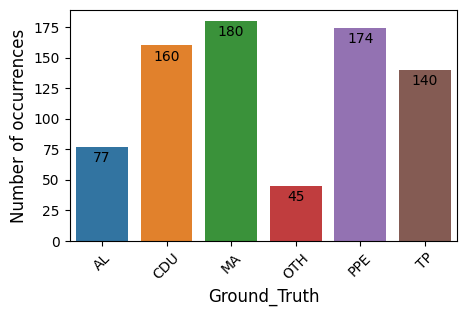

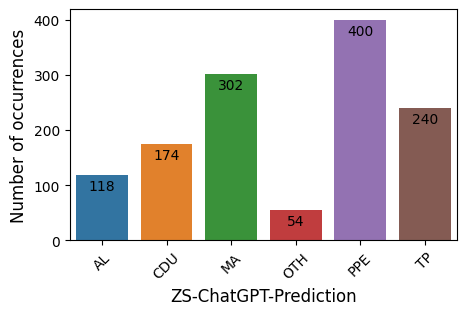

In [ ]:
import ast

from sklearn.metrics import cohen_kappa_score

target_cols= ['AL', 'CDU', 'MA','OTH', 'PPE', 'TP']
lst1, lst2 =  data['Labels'].apply(ast.literal_eval), data['ChatGPT-Prediction'].apply(ast.literal_eval)
Kappa_Score_Calculation(lst1, lst2, "ZS-ChatGPT-Prediction")

## Confusion Matrix and Overprediction Ration

In [ ]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, f1_score
np.random.seed(42)
import nltk
import warnings
warnings.filterwarnings('ignore')

CPU times: user 10.9 ms, sys: 0 ns, total: 10.9 ms
Wall time: 12.1 ms


In [ ]:
## Folder Path
path = '/content/drive/MyDrive/Omar/AAAI-Submission/ChatGPT-Exps/'
## File Name
file_name = path +'F1-CoT-2-ChatGPT-Predictions.csv'
data = pd.read_csv(file_name)
data.head()

,Text,AL,MA,PPE,CDU,TP,OTH,Labels,ChatGPT-Prediction
0,"Just started on Bupe today, actually just put ...",0,1,1,0,0,0,"['MA', 'PPE']","['MA', 'TP', 'PPE', 'CDU']"
1,Day 5 detox and all I have left is rls. I jump...,0,0,1,0,1,0,"['PPE', 'TP']",['TP']
2,Drug testing question. Hello everyone!\n\nHad ...,0,0,0,0,0,1,['OTH'],['OTH']
3,Inpatient Rehab Question. I’m going to a 28 da...,0,0,1,0,1,0,"['PPE', 'TP']","['MA', 'TP', 'PPE']"
4,Am I the only one who wants to stay on bupe fo...,0,0,0,0,0,1,['OTH'],['MA']


In [ ]:
!pip install ast
import ast

target_cols= ['AL', 'CDU', 'MA','OTH', 'PPE', 'TP']
lst1, lst2 =  data['Labels'].apply(ast.literal_eval), data['ChatGPT-Prediction'].apply(ast.literal_eval)

  Using cached AST-0.0.2.tar.gz (19 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
multilabel = MultiLabelBinarizer()
multilabel.fit([target_cols])
print(multilabel.classes_)
true = multilabel.fit_transform(lst1)
pred = multilabel.fit_transform(lst2)
print(classification_report(true, pred, target_names=target_cols))
print("F1: ", f1_score(true, pred, average='weighted'))

['AL' 'CDU' 'MA' 'OTH' 'PPE' 'TP']
              precision    recall  f1-score   support

          AL       0.62      0.78      0.69        77
         CDU       0.74      0.56      0.64       160
          MA       0.49      0.87      0.62       180
         OTH       0.41      0.67      0.50        45
         PPE       0.49      0.76      0.60       174
          TP       0.55      0.89      0.68       140

   micro avg       0.53      0.76      0.63       776
   macro avg       0.55      0.75      0.62       776
weighted avg       0.56      0.76      0.63       776
 samples avg       0.57      0.75      0.61       776

F1:  0.6306199934745601


In [ ]:
xT = pd.DataFrame(true, columns=target_cols)
xP = pd.DataFrame(pred, columns=target_cols)

In [ ]:
for x in target_cols:
    print(x)
    print("Actual: ", xT[x].sum(axis=0), "Predicted: ", xP[x].sum(axis=0))

AL
Actual:  77 Predicted:  96
CDU
Actual:  160 Predicted:  122
MA
Actual:  180 Predicted:  323
OTH
Actual:  45 Predicted:  74
PPE
Actual:  174 Predicted:  267
TP
Actual:  140 Predicted:  227


In [ ]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix

confusion_matrices = multilabel_confusion_matrix(true, pred)
print(confusion_matrices)

def print_confusion_matrices(confusion_matrices):
    for i, cm in zip(target_cols, confusion_matrices):
        print(f"Confusion Matrix for Label {i}:")
        print(confusion_matrix)
        print("Predicted postive :", cm[0][1]+cm[1][1], "False Positive: ", cm[0][1], "\nOverprediction ration: ",cm[0][1]/(cm[0][1]+cm[1][1]))
        print("=" * 30)

print_confusion_matrices(confusion_matrices)

[[[396  36]
  [ 17  60]]

 [[317  32]
  [ 70  90]]

 [[163 166]
  [ 23 157]]

 [[420  44]
  [ 15  30]]

 [[200 135]
  [ 42 132]]

 [[266 103]
  [ 16 124]]]
Confusion Matrix for Label AL:
<function confusion_matrix at 0x78ef7dee1d80>
Predicted postive : 96 False Positive:  36 
Overprediction ration:  0.375
Confusion Matrix for Label CDU:
<function confusion_matrix at 0x78ef7dee1d80>
Predicted postive : 122 False Positive:  32 
Overprediction ration:  0.26229508196721313
Confusion Matrix for Label MA:
<function confusion_matrix at 0x78ef7dee1d80>
Predicted postive : 323 False Positive:  166 
Overprediction ration:  0.5139318885448917
Confusion Matrix for Label OTH:
<function confusion_matrix at 0x78ef7dee1d80>
Predicted postive : 74 False Positive:  44 
Overprediction ration:  0.5945945945945946
Confusion Matrix for Label PPE:
<function confusion_matrix at 0x78ef7dee1d80>
Predicted postive : 267 False Positive:  135 
Overprediction ration:  0.5056179775280899
Confusion Matrix for Label T

Confusion Matrix for Label AM:
Confusion Matrix for Label RL:
Confusion Matrix for Label TM:
Confusion Matrix for Label Oth:
Confusion Matrix for Label EP:
Confusion Matrix for Label TP:


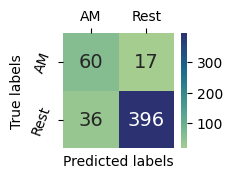

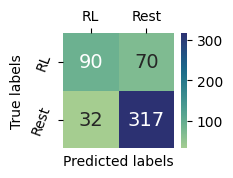

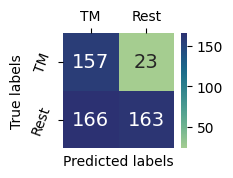

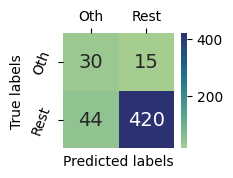

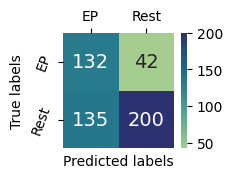

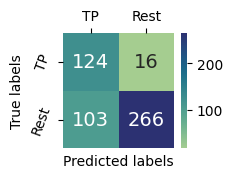

In [ ]:
## Confusion matrix function
lbls = ['AM', 'RL', 'TM', 'Oth', 'EP', 'TP']
def con_mat_heatmap(cm,classname):
  #cm = confusion_matrix(true,pred,labels=['Positive','Negative','Neutral'])
  #sns.set()
  plt.figure(figsize =(1.8, 1.5))
  ax = plt.subplot()
  sns.heatmap(cm, annot=True,fmt="d",cmap= 'crest', ax = ax,annot_kws={"size": 14},) #annot=True to annotate cells
  # labels, title and ticks
  ax.set_xlabel('Predicted labels',fontsize=10)
  ax.set_ylabel('True labels',fontsize=10)
  #print ('=== ',f"Confusion Matrix of {classname}")
  ax.xaxis.set_ticklabels([f'{classname}','Rest'],fontsize=10, rotation=0,);
  ax.yaxis.set_ticklabels([f'{classname}','Rest'],fontsize=10, rotation=70);
  ax.xaxis.tick_top()
  plt.savefig(f"{classname}.png",bbox_inches='tight',dpi =400)

for i, cm in zip(lbls, confusion_matrices):
        print(f"Confusion Matrix for Label {i}:")
        con_mat_heatmap(np.flip(cm),i)


## Make errors in long texts

In [ ]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, f1_score
np.random.seed(42)
import nltk
import warnings
warnings.filterwarnings('ignore')

CPU times: user 987 µs, sys: 0 ns, total: 987 µs
Wall time: 999 µs


In [ ]:
## Folder Path
path = '/content/drive/MyDrive/Omar/AAAI-Submission/ChatGPT-Exps/'
## File Name
file_name = path +'F1-CoT-2-ChatGPT-Predictions.csv'
data = pd.read_csv(file_name)
data.head()

!pip install ast
import ast

target_cols= ['AL', 'CDU', 'MA','OTH', 'PPE', 'TP']
lst1, lst2 =  data['Labels'].apply(ast.literal_eval), data['ChatGPT-Prediction'].apply(ast.literal_eval)

  Using cached AST-0.0.2.tar.gz (19 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
dis1, dis2, dis3 = [], [], []
c, d, e = 0, 0, 0

for i in range(len(lst1)):
    s1 = set(lst1[i])
    s2 = set (lst2[i])
    txt = data['Text'][i]
    l = len(txt.split())
    if(s1==s2):
        c+=1
        dis1.append(l)
    else:
        if(len(s1.intersection(s2))>0):
            dis2.append(l)
            d+=1
        else:
            dis3.append(l)
            e+=1

print("Exact: ", c, "\n>=1: ", d,"\nNo Match: ",e, "\nTotal: ", c+d+e)



dis1, dis2, dis3 = np.array(dis1), np.array(dis2), np.array(dis3)
dis4= np.concatenate((dis2, dis3), axis=0)

Exact:  130 
>=1:  287 
No Match:  92 
Total:  509


In [ ]:
print(np.mean(dis1), np.mean(dis2), np.mean(dis3), np.mean(dis4))


102.18181818181819 126.62033898305084 132.58064516129033 128.04896907216494


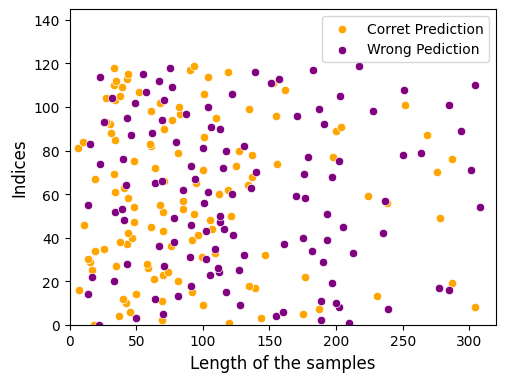

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
ns =120
v1, v2 = dis1, dis2

plt.figure(figsize =(5.5, 4.1))
ax = plt.subplot()

x = np.arange(0, ns, 1)
# Assuming you have two arrays, dis1 and dis2, containing 100 random numbers ranging from 0 to 200
v1 = random.sample(v1.tolist(), ns)
v2 = random.sample(v2.tolist(), ns)

# Create a scatter plot using Seaborn
sns.scatterplot(x=v1, y=x, ax= ax, label='Corret Prediction', color='orange', marker='o')
sns.scatterplot(x=v2, y=x, ax= ax,  label='Wrong Pediction', color='purple', marker='o')

# Set labels for x and y axes
ax.set_xlabel('Length of the samples',fontsize=12)
ax.set_ylabel('Indices', fontsize=12)
ax.set_xlim(0, 320)
ax.set_ylim(0, 145)

plt.savefig("Length.png",bbox_inches='tight',dpi =400)


## Confusion Calculation

In [ ]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, f1_score
np.random.seed(42)
import nltk
import warnings
warnings.filterwarnings('ignore')

CPU times: user 681 µs, sys: 0 ns, total: 681 µs
Wall time: 687 µs


In [ ]:
## Folder Path
path = '/content/drive/MyDrive/Omar/AAAI-Submission/ChatGPT-Exps/'
## File Name
file_name = path +'F1-CoT-2-ChatGPT-Predictions.csv'
data = pd.read_csv(file_name)
data.head()

,Text,AL,MA,PPE,CDU,TP,OTH,Labels,ChatGPT-Prediction
0,"Just started on Bupe today, actually just put ...",0,1,1,0,0,0,"['MA', 'PPE']","['MA', 'TP', 'PPE', 'CDU']"
1,Day 5 detox and all I have left is rls. I jump...,0,0,1,0,1,0,"['PPE', 'TP']",['TP']
2,Drug testing question. Hello everyone!\n\nHad ...,0,0,0,0,0,1,['OTH'],['OTH']
3,Inpatient Rehab Question. I’m going to a 28 da...,0,0,1,0,1,0,"['PPE', 'TP']","['MA', 'TP', 'PPE']"
4,Am I the only one who wants to stay on bupe fo...,0,0,0,0,0,1,['OTH'],['MA']


In [ ]:
!pip install ast
import ast

target_cols= ['AL', 'CDU', 'MA','OTH', 'PPE', 'TP']
lst1, lst2 =  data['Labels'].apply(ast.literal_eval), data['ChatGPT-Prediction'].apply(ast.literal_eval)

  Using cached AST-0.0.2.tar.gz (19 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from collections import defaultdict
# Initialize an empty dictionary
my_dict = defaultdict(int)

for i in target_cols:
    print(i)
    my_dict[i] = defaultdict(int)

# Loop through each row
my_dict

AL
CDU
MA
OTH
PPE
TP


defaultdict(int,
            {'AL': defaultdict(int, {}),
             'CDU': defaultdict(int, {}),
             'MA': defaultdict(int, {}),
             'OTH': defaultdict(int, {}),
             'PPE': defaultdict(int, {}),
             'TP': defaultdict(int, {})})

In [ ]:

for i in range(len(lst1)):
    s1 = set(lst1[i])
    s2 = set (lst2[i])
    #print(s1, s2)
    for x in s1:
        if x not in s2:
          inter = s1.intersection(s2)
          bad = list(s2-inter)
          print(s1, s2)
          print(x, bad)
          for y in bad:
            my_dict[x][y] += 1

print(my_dict)

{'TP', 'PPE'} {'TP'}
PPE []
{'OTH'} {'MA'}
OTH ['MA']
{'AL', 'PPE'} {'PPE', 'CDU', 'TP', 'MA'}
AL ['CDU', 'MA', 'TP']
{'TP', 'PPE'} {'TP', 'MA'}
PPE ['MA']
{'TP'} {'OTH'}
TP ['OTH']
{'CDU', 'MA'} {'PPE', 'TP', 'MA'}
CDU ['TP', 'PPE']
{'PPE'} {'OTH'}
PPE ['OTH']
{'TP'} {'OTH'}
TP ['OTH']
{'AL'} {'OTH'}
AL ['OTH']
{'CDU'} {'PPE', 'TP', 'MA'}
CDU ['TP', 'MA', 'PPE']
{'MA'} {'TP'}
MA ['TP']
{'CDU'} {'PPE', 'MA'}
CDU ['MA', 'PPE']
{'CDU'} {'AL'}
CDU ['AL']
{'AL'} {'MA'}
AL ['MA']
{'PPE', 'CDU', 'MA'} {'CDU', 'TP', 'MA'}
PPE ['TP']
{'PPE', 'TP', 'MA'} {'OTH'}
PPE ['OTH']
{'PPE', 'TP', 'MA'} {'OTH'}
TP ['OTH']
{'PPE', 'TP', 'MA'} {'OTH'}
MA ['OTH']
{'CDU'} {'PPE', 'MA'}
CDU ['MA', 'PPE']
{'CDU', 'MA'} {'PPE', 'TP', 'MA'}
CDU ['TP', 'PPE']
{'OTH'} {'MA'}
OTH ['MA']
{'TP', 'PPE'} {'TP', 'MA'}
PPE ['MA']
{'MA'} {'TP', 'PPE'}
MA ['TP', 'PPE']
{'CDU'} {'MA'}
CDU ['MA']
{'CDU'} {'PPE', 'MA'}
CDU ['MA', 'PPE']
{'TP', 'CDU', 'MA'} {'PPE', 'TP', 'MA'}
CDU ['PPE']
{'AL', 'CDU'} {'CDU', 'MA'}
AL ['MA']


In [ ]:
for x in target_cols:
    print(x)
    print(my_dict[x])
    for y in my_dict[x]:
        print(x, y, my_dict[x][y])



AL
defaultdict(<class 'int'>, {'CDU': 2, 'MA': 7, 'TP': 2, 'OTH': 5, 'PPE': 3})
AL CDU 2
AL MA 7
AL TP 2
AL OTH 5
AL PPE 3
CDU
defaultdict(<class 'int'>, {'TP': 15, 'PPE': 31, 'MA': 29, 'AL': 6, 'OTH': 11})
CDU TP 15
CDU PPE 31
CDU MA 29
CDU AL 6
CDU OTH 11
MA
defaultdict(<class 'int'>, {'TP': 2, 'OTH': 10, 'PPE': 2, 'AL': 1, 'CDU': 2})
MA TP 2
MA OTH 10
MA PPE 2
MA AL 1
MA CDU 2
OTH
defaultdict(<class 'int'>, {'MA': 10, 'AL': 4, 'PPE': 4, 'CDU': 2, 'TP': 1})
OTH MA 10
OTH AL 4
OTH PPE 4
OTH CDU 2
OTH TP 1
PPE
defaultdict(<class 'int'>, {'MA': 6, 'OTH': 20, 'TP': 5, 'AL': 1, 'CDU': 3})
PPE MA 6
PPE OTH 20
PPE TP 5
PPE AL 1
PPE CDU 3
TP
defaultdict(<class 'int'>, {'OTH': 8, 'AL': 2, 'CDU': 1, 'PPE': 2, 'MA': 1})
TP OTH 8
TP AL 2
TP CDU 1
TP PPE 2
TP MA 1


## Analysis of XLNet Model as ChatGPT

In [ ]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, f1_score
np.random.seed(42)
import nltk
import warnings
warnings.filterwarnings('ignore')

CPU times: user 1.17 ms, sys: 0 ns, total: 1.17 ms
Wall time: 1.18 ms


In [ ]:
## Folder Path
path = '/content/drive/MyDrive/Omar/AAAI-Submission/ChatGPT-Exps/'
## File Name

## Getting the True Labels
file_name = path +'F1-CoT-2-ChatGPT-Predictions.csv'
data1 = pd.read_csv(file_name)

## Getting XLNET Predictions
file_name = path +'XLNet-Predictions.csv'
data2 = pd.read_csv(file_name)

!pip install ast
import ast

target_cols= ['AL', 'CDU', 'MA','OTH', 'PPE', 'TP']
lst1, lst2 =  data1['Labels'].apply(ast.literal_eval), data2['Predictions'].apply(ast.literal_eval)

  Using cached AST-0.0.2.tar.gz (19 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
multilabel = MultiLabelBinarizer()
multilabel.fit([target_cols])
print(multilabel.classes_)
true = multilabel.fit_transform(lst1)
pred = multilabel.fit_transform(lst2)
print(classification_report(true, pred, target_names=target_cols))
print("F1: ", f1_score(true, pred, average='weighted'))

['AL' 'CDU' 'MA' 'OTH' 'PPE' 'TP']
              precision    recall  f1-score   support

          AL       0.84      0.82      0.83        77
         CDU       0.88      0.85      0.86       160
          MA       0.79      0.72      0.75       180
         OTH       0.73      0.53      0.62        45
         PPE       0.59      0.78      0.67       174
          TP       0.85      0.84      0.85       140

   micro avg       0.76      0.78      0.77       776
   macro avg       0.78      0.76      0.76       776
weighted avg       0.78      0.78      0.77       776
 samples avg       0.75      0.78      0.74       776

F1:  0.7743713987532512


In [ ]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix

confusion_matrices = multilabel_confusion_matrix(true, pred)
print(confusion_matrices)

def print_confusion_matrices(confusion_matrices):
    for i, cm in zip(target_cols, confusion_matrices):
        print(f"Confusion Matrix for Label {i}:")
        print(confusion_matrix)
        print("Predicted postive :", cm[0][1]+cm[1][1], "False Positive: ", cm[0][1], "\nOverprediction ration: ",cm[0][1]/(cm[0][1]+cm[1][1]))
        print("=" * 30)

print_confusion_matrices(confusion_matrices)

[[[420  12]
  [ 14  63]]

 [[330  19]
  [ 24 136]]

 [[294  35]
  [ 50 130]]

 [[455   9]
  [ 21  24]]

 [[243  92]
  [ 39 135]]

 [[348  21]
  [ 22 118]]]
Confusion Matrix for Label AL:
<function confusion_matrix at 0x7f13fe71be20>
Predicted postive : 75 False Positive:  12 
Overprediction ration:  0.16
Confusion Matrix for Label CDU:
<function confusion_matrix at 0x7f13fe71be20>
Predicted postive : 155 False Positive:  19 
Overprediction ration:  0.12258064516129032
Confusion Matrix for Label MA:
<function confusion_matrix at 0x7f13fe71be20>
Predicted postive : 165 False Positive:  35 
Overprediction ration:  0.21212121212121213
Confusion Matrix for Label OTH:
<function confusion_matrix at 0x7f13fe71be20>
Predicted postive : 33 False Positive:  9 
Overprediction ration:  0.2727272727272727
Confusion Matrix for Label PPE:
<function confusion_matrix at 0x7f13fe71be20>
Predicted postive : 227 False Positive:  92 
Overprediction ration:  0.4052863436123348
Confusion Matrix for Label TP:


Confusion Matrix for Label AM:
Confusion Matrix for Label RL:
Confusion Matrix for Label TM:
Confusion Matrix for Label OTH:
Confusion Matrix for Label EP:
Confusion Matrix for Label TP:


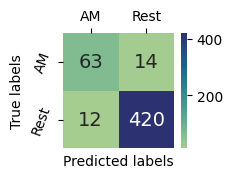

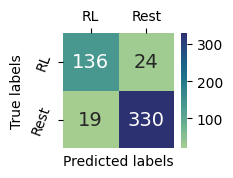

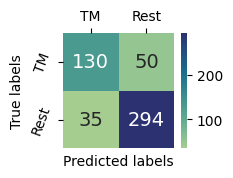

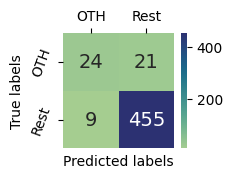

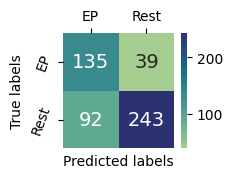

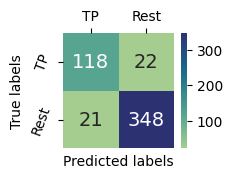

In [ ]:
## Confusion matrix function
lbls = ['AM', 'RL', 'TM', 'OTH', 'EP', 'TP']
def con_mat_heatmap(cm,classname):
  #cm = confusion_matrix(true,pred,labels=['Positive','Negative','Neutral'])
  #sns.set()
  plt.figure(figsize =(1.8, 1.5))
  ax = plt.subplot()
  sns.heatmap(cm, annot=True,fmt="d",cmap= 'crest', ax = ax,annot_kws={"size": 14},) #annot=True to annotate cells
  # labels, title and ticks
  ax.set_xlabel('Predicted labels',fontsize=10)
  ax.set_ylabel('True labels',fontsize=10)
  #print ('=== ',f"Confusion Matrix of {classname}")
  ax.xaxis.set_ticklabels([f'{classname}','Rest'],fontsize=10, rotation=0,);
  ax.yaxis.set_ticklabels([f'{classname}','Rest'],fontsize=10, rotation=70);
  ax.xaxis.tick_top()
  plt.savefig(f"{classname}.png",bbox_inches='tight',dpi =400)

for i, cm in zip(lbls, confusion_matrices):
        print(f"Confusion Matrix for Label {i}:")
        con_mat_heatmap(np.flip(cm),i)


## Error Checking in Long Texts

In [ ]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, f1_score
np.random.seed(42)
import nltk
import warnings
warnings.filterwarnings('ignore')

CPU times: user 1.4 ms, sys: 0 ns, total: 1.4 ms
Wall time: 1.44 ms


In [ ]:
## Folder Path
path = '/content/drive/MyDrive/Omar/AAAI-Submission/ChatGPT-Exps/'
## File Name

## Getting the True Labels
file_name = path +'F1-CoT-2-ChatGPT-Predictions.csv'
data1 = pd.read_csv(file_name)

## Getting XLNET Predictions
file_name = path +'XLNet-Predictions.csv'
data2 = pd.read_csv(file_name)

!pip install ast
import ast

target_cols= ['AL', 'CDU', 'MA','OTH', 'PPE', 'TP']
lst1, lst2 =  data1['Labels'].apply(ast.literal_eval), data2['Predictions'].apply(ast.literal_eval)

  Using cached AST-0.0.2.tar.gz (19 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
dis1, dis2, dis3 = [], [], []
c, d, e = 0, 0, 0

for i in range(len(lst1)):
    s1 = set(lst1[i])
    s2 = set (lst2[i])
    txt = data1['Text'][i]
    l = len(txt.split())
    if(s1==s2):
        c+=1
        dis1.append(l)
    else:
        if(len(s1.intersection(s2))>0):
            dis2.append(l)
            d+=1
        else:
            dis3.append(l)
            e+=1

print("Exact: ", c, "\n>=1: ", d,"\nNo Match: ",e, "\nTotal: ", c+d+e)



dis1, dis2, dis3 = np.array(dis1), np.array(dis2), np.array(dis3)
dis4= np.concatenate((dis2, dis3), axis=0)

Exact:  249 
>=1:  193 
No Match:  67 
Total:  509


In [ ]:
print(np.mean(dis1), np.mean(dis2), np.mean(dis3), np.mean(dis4))


102.77510040160642 155.94818652849742 94.8955223880597 140.2153846153846


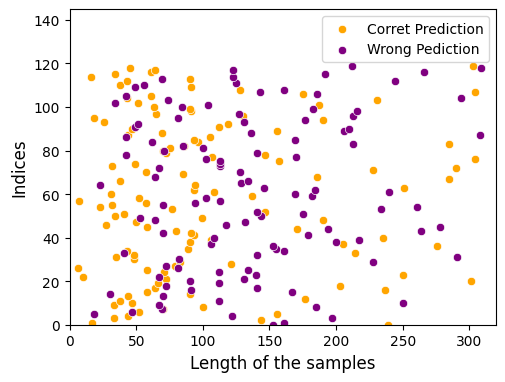

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
ns =120
v1, v2 = dis1, dis2

plt.figure(figsize =(5.5, 4.1))
ax = plt.subplot()

x = np.arange(0, ns, 1)
# Assuming you have two arrays, dis1 and dis2, containing 100 random numbers ranging from 0 to 200
v1 = random.sample(v1.tolist(), ns)
v2 = random.sample(v2.tolist(), ns)

# Create a scatter plot using Seaborn
sns.scatterplot(x=v1, y=x, ax= ax, label='Corret Prediction', color='orange', marker='o')
sns.scatterplot(x=v2, y=x, ax= ax,  label='Wrong Pediction', color='purple', marker='o')

# Set labels for x and y axes
ax.set_xlabel('Length of the samples',fontsize=12)
ax.set_ylabel('Indices', fontsize=12)
ax.set_xlim(0, 320)
ax.set_ylim(0, 145)

plt.savefig("Length.png",bbox_inches='tight',dpi =400)


## Confusion calculation

In [ ]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, f1_score
np.random.seed(42)
import nltk
import warnings
warnings.filterwarnings('ignore')

CPU times: user 1.13 ms, sys: 29 µs, total: 1.16 ms
Wall time: 1.17 ms


In [ ]:
## Folder Path
path = '/content/drive/MyDrive/Omar/AAAI-Submission/ChatGPT-Exps/'
## File Name

## Getting the True Labels
file_name = path +'F1-CoT-2-ChatGPT-Predictions.csv'
data1 = pd.read_csv(file_name)

## Getting XLNET Predictions
file_name = path +'XLNet-Predictions.csv'
data2 = pd.read_csv(file_name)

!pip install ast
import ast

target_cols= ['AL', 'CDU', 'MA','OTH', 'PPE', 'TP']
lst1, lst2 =  data1['Labels'].apply(ast.literal_eval), data2['Predictions'].apply(ast.literal_eval)

  Using cached AST-0.0.2.tar.gz (19 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from collections import defaultdict
# Initialize an empty dictionary
my_dict = defaultdict(int)

for i in target_cols:
    print(i)
    my_dict[i] = defaultdict(int)

# Loop through each row
my_dict

AL
CDU
MA
OTH
PPE
TP


defaultdict(int,
            {'AL': defaultdict(int, {}),
             'CDU': defaultdict(int, {}),
             'MA': defaultdict(int, {}),
             'OTH': defaultdict(int, {}),
             'PPE': defaultdict(int, {}),
             'TP': defaultdict(int, {})})

In [ ]:

for i in range(len(lst1)):
    s1 = set(lst1[i])
    s2 = set (lst2[i])
    #print(s1, s2)
    for x in s1:
        if x not in s2:
          inter = s1.intersection(s2)
          bad = list(s2-inter)
          print(s1, s2)
          print(x, bad)
          for y in bad:
            my_dict[x][y] += 1

print(my_dict)

{'MA', 'PPE'} {'MA'}
PPE []
{'OTH'} set()
OTH []
{'TP', 'PPE'} set()
TP []
{'TP', 'PPE'} set()
PPE []
{'OTH'} {'AL'}
OTH ['AL']
{'AL', 'PPE'} {'CDU'}
AL ['CDU']
{'AL', 'PPE'} {'CDU'}
PPE ['CDU']
{'CDU'} {'MA'}
CDU ['MA']
{'MA', 'PPE'} set()
MA []
{'MA', 'PPE'} set()
PPE []
{'MA', 'TP'} {'TP', 'PPE'}
MA ['PPE']
{'TP', 'PPE'} {'TP'}
PPE []
{'CDU', 'MA'} {'CDU', 'PPE'}
MA ['PPE']
{'TP', 'PPE'} {'PPE'}
TP []
{'TP', 'PPE'} {'TP'}
PPE []
{'CDU', 'MA', 'PPE'} {'CDU', 'PPE'}
MA []
{'CDU', 'MA'} {'CDU', 'TP'}
MA ['TP']
{'CDU', 'MA', 'PPE'} {'CDU', 'MA'}
PPE []
{'CDU'} {'PPE'}
CDU ['PPE']
{'OTH'} {'MA'}
OTH ['MA']
{'AL', 'MA'} {'AL'}
MA []
{'CDU', 'MA', 'PPE'} {'MA', 'PPE'}
CDU []
{'MA', 'TP'} {'TP'}
MA []
{'CDU', 'MA'} {'CDU'}
MA []
{'CDU', 'MA', 'PPE'} {'CDU', 'MA'}
PPE []
{'MA', 'TP', 'PPE'} {'TP', 'PPE'}
MA []
{'CDU', 'MA'} {'MA'}
CDU []
{'OTH'} {'MA'}
OTH ['MA']
{'CDU', 'MA', 'PPE'} {'CDU', 'MA'}
PPE []
{'OTH'} {'AL'}
OTH ['AL']
{'CDU', 'MA', 'TP'} {'CDU', 'MA'}
TP []
{'MA', 'PPE'} {'PPE'}


In [ ]:
for x in target_cols:
    print(x)
    print(my_dict[x])
    for y in my_dict[x]:
        print(x, y, my_dict[x][y])



AL
defaultdict(<class 'int'>, {'CDU': 2, 'MA': 1, 'OTH': 3, 'PPE': 3, 'TP': 1})
AL CDU 2
AL MA 1
AL OTH 3
AL PPE 3
AL TP 1
CDU
defaultdict(<class 'int'>, {'MA': 5, 'PPE': 6, 'TP': 1, 'OTH': 1})
CDU MA 5
CDU PPE 6
CDU TP 1
CDU OTH 1
MA
defaultdict(<class 'int'>, {'PPE': 10, 'TP': 6, 'OTH': 3, 'CDU': 5})
MA PPE 10
MA TP 6
MA OTH 3
MA CDU 5
OTH
defaultdict(<class 'int'>, {'AL': 7, 'MA': 3, 'PPE': 1, 'TP': 1})
OTH AL 7
OTH MA 3
OTH PPE 1
OTH TP 1
PPE
defaultdict(<class 'int'>, {'CDU': 2, 'TP': 1, 'AL': 1, 'MA': 1})
PPE CDU 2
PPE TP 1
PPE AL 1
PPE MA 1
TP
defaultdict(<class 'int'>, {'MA': 5, 'PPE': 6, 'CDU': 1})
TP MA 5
TP PPE 6
TP CDU 1


# Length comparison (IMP) ChatGPT and XLNet

In [ ]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, f1_score
np.random.seed(42)
import nltk
import warnings
warnings.filterwarnings('ignore')

CPU times: user 1.42 s, sys: 336 ms, total: 1.76 s
Wall time: 2.75 s


In [ ]:
## Folder Path
path = '/content/drive/MyDrive/Omar/AAAI-Submission/ChatGPT-Exps/'
## File Name

## Getting the True Labels
file_name = path +'F1-CoT-2-ChatGPT-Predictions.csv'
data1 = pd.read_csv(file_name)

## Getting XLNET Predictions
file_name = path +'XLNet-Predictions.csv'
data2 = pd.read_csv(file_name)

!pip install ast
import ast

target_cols= ['AL', 'CDU', 'MA','OTH', 'PPE', 'TP']
true, CG_pred, XL_pred =  data1['Labels'].apply(ast.literal_eval), data1['ChatGPT-Prediction'].apply(ast.literal_eval), data2['Predictions'].apply(ast.literal_eval)

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
print(true)
print(CG_pred)
print(XL_pred)


0      [MA, PPE]
1      [PPE, TP]
2          [OTH]
3      [PPE, TP]
4          [OTH]
         ...    
504    [CDU, TP]
505        [OTH]
506        [CDU]
507         [MA]
508    [MA, CDU]
Name: Labels, Length: 509, dtype: object
0      [MA, TP, PPE, CDU]
1                    [TP]
2                   [OTH]
3           [MA, TP, PPE]
4                    [MA]
              ...        
504             [TP, PPE]
505                 [PPE]
506             [AL, CDU]
507                  [MA]
508        [MA, PPE, CDU]
Name: ChatGPT-Prediction, Length: 509, dtype: object
0                [MA]
1           [PPE, TP]
2                  []
3                  []
4               [OTH]
            ...      
504    [PPE, CDU, TP]
505                []
506             [CDU]
507              [MA]
508         [MA, CDU]
Name: Predictions, Length: 509, dtype: object


In [ ]:


rows = 300 # the maximum possible length
columns = 3 #
hist1 = np.zeros((rows, columns))


for i in range(len(true)):
    s1 = set(true[i])
    s2 = set(CG_pred[i])
    txt = data1['Text'][i]
    l = len(txt.split())
    if(l>=rows):
        continue
    hist1[l][0]+=1
    if(s1==s2):
        hist1[l][2]+=1 ## Increment for correct prediction
    else:
        hist1[l][1]+=1 ## Increment for wrong prediction


rows = 300 # the maximum possible length
columns = 3 #
hist2 = np.zeros((rows, columns))


for i in range(len(true)):
    s1 = set(true[i])
    s2 = set (XL_pred[i])
    txt = data1['Text'][i]
    l = len(txt.split())
    if(l>=rows):
        continue
    hist2[l][0]+=1
    if(s1==s2):
        hist2[l][2]+=1 ## Increment for correct prediction
    else:
        hist2[l][1]+=1 ## Increment for wrong prediction


In [ ]:
print(hist1, hist2)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 1.]
 [1. 0. 1.]
 [0. 0. 0.]
 [1. 1. 0.]
 [1. 0. 1.]
 [1. 0. 1.]
 [0. 0. 0.]
 [1. 1. 0.]
 [3. 2. 1.]
 [3. 2. 1.]
 [4. 4. 0.]
 [4. 3. 1.]
 [3. 2. 1.]
 [3. 1. 2.]
 [1. 1. 0.]
 [0. 0. 0.]
 [3. 3. 0.]
 [3. 3. 0.]
 [1. 1. 0.]
 [1. 1. 0.]
 [3. 2. 1.]
 [3. 1. 2.]
 [0. 0. 0.]
 [1. 1. 0.]
 [3. 2. 1.]
 [1. 0. 1.]
 [5. 5. 0.]
 [6. 2. 4.]
 [5. 2. 3.]
 [2. 0. 2.]
 [1. 1. 0.]
 [2. 1. 1.]
 [3. 1. 2.]
 [3. 2. 1.]
 [2. 1. 1.]
 [3. 2. 1.]
 [4. 3. 1.]
 [5. 3. 2.]
 [3. 0. 3.]
 [4. 3. 1.]
 [2. 2. 0.]
 [6. 5. 1.]
 [6. 2. 4.]
 [3. 3. 0.]
 [3. 2. 1.]
 [3. 2. 1.]
 [3. 2. 1.]
 [2. 2. 0.]
 [1. 1. 0.]
 [2. 2. 0.]
 [2. 2. 0.]
 [2. 1. 1.]
 [4. 3. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [5. 2. 3.]
 [2. 2. 0.]
 [2. 1. 1.]
 [5. 4. 1.]
 [2. 2. 0.]
 [2. 2. 0.]
 [5. 5. 0.]
 [4. 2. 2.]
 [6. 4. 2.]
 [9. 6. 3.]
 [5. 3. 2.]
 [5. 5. 0.]
 [1. 1. 0.]
 [4. 3. 1.]
 [1. 1. 0.]
 [2. 1. 1.]
 [4. 3. 1.]
 [3. 3. 0.]
 [1. 1. 0.]
 [2. 2. 0.]
 [5. 3. 2.]
 [4. 3. 1.]
 [1.

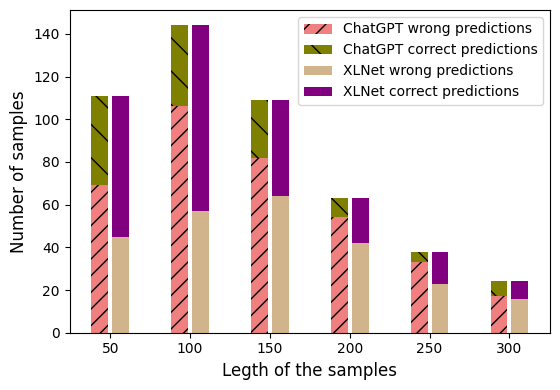

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data as placeholders for your arrays
# Replace these with your actual data
np.random.seed(0)
data1 = hist1
data2 = hist2

# Sum up the values within intervals of size 10 for both arrays
interval_size = 50
num_intervals = (data1.shape[0] + interval_size - 1) // interval_size
interval_sums1 = np.zeros((num_intervals, data1.shape[1]))
interval_sums2 = np.zeros((num_intervals, data2.shape[1]))

for i in range(num_intervals):
    start_idx = i * interval_size
    end_idx = min((i + 1) * interval_size, data1.shape[0])
    interval_sums1[i] = np.sum(data1[start_idx:end_idx], axis=0)
    interval_sums2[i] = np.sum(data2[start_idx:end_idx], axis=0)

# Create a bar plot with different colors for both arrays
x = np.arange(0, num_intervals) * interval_size + interval_size
width = 10.5
spacing = 6.5


fig, ax = plt.subplots(figsize=(5.7, 4))

rects1_1 = ax.bar(x - spacing, interval_sums1[:, 1], width,
                  label='ChatGPT wrong predictions', color='lightcoral', hatch='//')
rects2_1 = ax.bar(x - spacing, interval_sums1[:, 2], width, bottom=interval_sums1[:, 1],
                  label='ChatGPT correct predictions', color='olive', hatch = '\\')

rects1_2 = ax.bar(x + spacing, interval_sums2[:, 1], width, label='XLNet wrong predictions',
                  color='tan', hatch = '')
rects2_2 = ax.bar(x + spacing, interval_sums2[:, 2], width, bottom=interval_sums2[:, 1],
                  label='XLNet correct predictions', color='purple', hatch = '')


ax.set_ylabel('Number of samples', fontsize=12)
ax.set_xlabel('Legth of the samples', fontsize=12)
#ax.set_title('Sum of Predictions within Intervals')
ax.set_xticks(x)
ax.legend()

fig.tight_layout()

plt.show()
plt.savefig("type1.png",bbox_inches='tight',dpi =400)

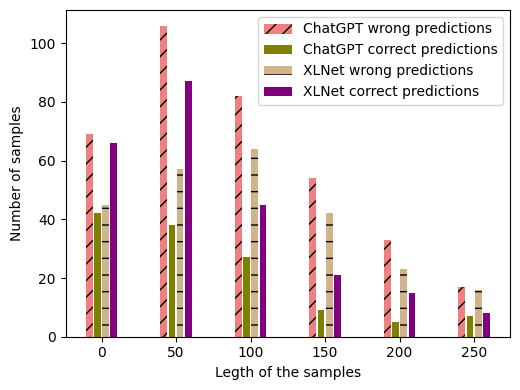

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data as placeholders for your arrays
# Replace these with your actual data
np.random.seed(0)
data1 = hist1
data2 = hist2

# Sum up the values within intervals of size 10 for both arrays
interval_size = 50
num_intervals = (data1.shape[0] + interval_size - 1) // interval_size
interval_sums1 = np.zeros((num_intervals, data1.shape[1]))
interval_sums2 = np.zeros((num_intervals, data2.shape[1]))

for i in range(num_intervals):
    start_idx = i * interval_size
    end_idx = min((i + 1) * interval_size, data1.shape[0])
    interval_sums1[i] = np.sum(data1[start_idx:end_idx], axis=0)
    interval_sums2[i] = np.sum(data2[start_idx:end_idx], axis=0)

# Create a bar plot with different colors for both arrays
x = np.arange(num_intervals) * interval_size
width = 4.5
spacing = 5.5

fig, ax = plt.subplots(figsize=(5.3, 4))

rects1_1 = ax.bar(x - 1.5 * spacing, interval_sums1[:, 1], width,
                  label='ChatGPT wrong predictions', color='lightcoral', hatch='//')
rects2_1 = ax.bar(x - 0.5 * spacing, interval_sums1[:, 2], width,
                  label='ChatGPT correct predictions', color='olive', hatch = '')
rects1_2 = ax.bar(x + 0.5 * spacing, interval_sums2[:, 1], width, label='XLNet wrong predictions',
                  color='tan', hatch = '-')
rects2_2 = ax.bar(x + 1.5 * spacing, interval_sums2[:, 2], width,
                  label='XLNet correct predictions', color='purple', hatch = '')

ax.set_ylabel('Number of samples')
ax.set_xlabel('Legth of the samples')
#ax.set_title('Sum of Predictions within Intervals')
ax.set_xticks(x)
ax.legend()

fig.tight_layout()

plt.show()
plt.savefig("type2.png",bbox_inches='tight',dpi =400)